# Анализ авторынка Казахстана в 2019 году

**Цель проекта:** Провести очистку данных для дальнейшего анализа. На основе анализа полученных данных о продажах автомобилей в Казахстане выработать предложения по развитию бизнеса одному из дилеров.

**Задачи:**
1.	Провести загрузку, предобработку и исследовательский анализ данных
2.	Проанализировать рынок
3.	Посчитать финансовые показатели
4.	Сделать выводы / дать рекомендации

**Описание данных (продажи автомобилей в Казахстане 2019 год)**
Датасет с данными по продажам автомобилей в Казахстане за 2019 год. Данные получены из официальной статистики VAG и переведены из Excel в csv Статистику собирал не один человек, поэтому могут быть различные кодировки признаков. 

`Год` – год продажи (2019)

`Месяц` – месяц продажи (январь - сентябрь)

`Компания` – название автоцентра

`Бренд` – название продаваемой марки автомобиля

`Модель` – название модели автомобиля

`Модификация` – модификация модели автомобиля 

`Год выпуска` – год производства автомобиля

`Страна-производитель` – страна, где произведен автомобиль

`Вид топлива` – бензин, дизель, электричество, гибрид

`Объём двиг л` – объем двигателя автомобиля в литрах

`Коробка передач` – тип коробки переключения передач 

`Тип привода` –задний привод, передний привод и т.п.

`Сегмент` – сегмент, к которому относится авто 

`Регион` – регион продажи

`Наименование дилерского центра` – совпадает с компанией 

`Тип клиента` – юридическое или физическое лицо 

`Форма расчета` – наличный и безналичный расчет

`Количество` – количество автомобилей в заказе

`Цена USD` – цена автомобиля

`Продажа USD` – цена заказа (цена авто умноженная на количество и за вычетом скидок если есть)

`Область` – область продажи

`Сегментация 2013` – сегмент автомобиля актуальный

`Класс 2013` – класс автомобиля актуальный

`Сегментация Eng` – английская сегментация 

`Локализация производства` – совпадает со страной производителем



## 1. Загрузка, предобработка и исследовательский анализ данных

In [1]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [2]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Загружаем данные
df = pd.read_csv('kz_2019_final_all_dirt.csv',  index_col=0)

C:\Users\semst\AppData\Local\Temp/ipykernel_12324/519716468.py:2: DtypeWarning: Columns (7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('kz_2019_final_all_dirt.csv',  index_col=0)


In [4]:
# Сделаем копию данных, для оценки поличества потерь после обработки данных
df_control = df.copy(  )

При загрузке возникает ошибка из-за раличного типа дынных в одной и той же колонке.
Вероятно это произошло при создании датасета на основе различных файлов

In [5]:
pd.set_option('display.max_columns', None) # отображаем все столбцы данных

Посмотрим первые 5 строк датафрейма

In [6]:
df.head()

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Март,Mercur Auto,Audi,A3,Audi A3 TFSI,2017,Германия,Бензин,1.4,S-tronic,NaN,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.0,31250.000000,31250.000000,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,1.4,S-Тronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,30581.000000,30581.000000,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Июнь,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,1.4,S-Тroic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Астана,Физ. Лицо,наличный,1.0,35087.719000,35087.719000,г.Алматы,Легковые автомобили,C класс,C,Импорт
3,2019,Июль,Mercur Auto,Audi,A3,TFSI,2017,Германия,Бензин,1.4,S-troic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.0,26608.232900,26608.232900,г.Алматы,Легковые автомобили,C класс,C,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,A4 Allroad TFSI,2017,Германия,Бензин,2,S-troic,quattro,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1.0,48343.982648,48343.982648,г.Алматы,Легковые автомобили,D класс,D,Импорт


Выведем основную информацию о датафрейме

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32854 entries, 0 to 32853
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Год                             32854 non-null  int64  
 1   Месяц                           32854 non-null  object 
 2   Компания                        32854 non-null  object 
 3   Бренд                           32854 non-null  object 
 4   Модель                          32854 non-null  object 
 5   Модификация                     29729 non-null  object 
 6   Год выпуска                     32700 non-null  object 
 7   Страна-производитель            32854 non-null  object 
 8   Вид топлива                     31942 non-null  object 
 9   Объём двиг, л,                  30968 non-null  object 
 10  Коробка передач                 31662 non-null  object 
 11  Тип привода                     30589 non-null  object 
 12  Сегмент                         

Удалим слеюущие столбцы, которые не нужны нам для дальнешего анализа:
 - Год (так как все данные представлены за 2019 год)
 - Модификация (не важен для анализа)
 - Сегмент (используем сегмент 2013)
 - Наименование дилерского центра (совпадает с компанией)
 - Тип клиента (не важен для анализа)
 - Форма расчета (много пропусков, не важен для анализа)
 - Область (частично повторяет реион, не важно для анализа)
 - Класс Eng (используем класс 2013)
 - Локализация производства (не важен для анализа)

In [8]:
df = df.drop(columns=['Год','Модификация','Сегмент', 'Наименование дилерского центра', 'Тип клиента',\
                      'Форма расчета', 'Область', 'Сегментация Eng', 'Локализация производства']) 


Приведем названия колонок к snake case

In [9]:
df.head()

,Месяц,Компания,Бренд,Модель,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Регион,Количество,"Цена, USD","Продажа, USD",Сегментация 2013,Класс 2013
0,Март,Mercur Auto,Audi,A3,2017,Германия,Бензин,1.4,S-tronic,NaN,Алматы,1.0,31250.000000,31250.000000,Легковые автомобили,C класс
1,Май,Mercur Auto,Audi,A3,2018,Германия,Бензин,1.4,S-Тronic,FWD,Алматы,1.0,30581.000000,30581.000000,Легковые автомобили,C класс
2,Июнь,Mercur Auto,Audi,A3,2018,Германия,Бензин,1.4,S-Тroic,FWD,Алматы,1.0,35087.719000,35087.719000,Легковые автомобили,C класс
3,Июль,Mercur Auto,Audi,A3,2017,Германия,Бензин,1.4,S-troic,передний,Алматы,1.0,26608.232900,26608.232900,Легковые автомобили,C класс
4,Июль,Mercur Auto,Audi,A4,2017,Германия,Бензин,2,S-troic,quattro,Алматы,1.0,48343.982648,48343.982648,Легковые автомобили,D класс


df.columns = ['month', 'company', 'brand', 'model', 'year_release', 'country_produce', 'fuel_type', 'engine_v', 'transmission', 'drive_unit', 'region', 'count', 'cost', 'sale', 'segment', 'class']


In [10]:
df.columns = (df.columns.str.lower()
 .str.replace(',', '')
 .str.replace('-', '_')
 .str.replace(' ', '_'))

Проверим корректность переименования

In [11]:
df.columns


Index(['месяц', 'компания', 'бренд', 'модель', 'год_выпуска',
       'страна_производитель', 'вид_топлива', 'объём_двиг_л',
       'коробка_передач', 'тип_привода', 'регион', 'количество', 'цена_usd',
       'продажа_usd', 'сегментация_2013', 'класс_2013'],
      dtype='object')

In [12]:
# Проверим наличие явных дубликатов
df.duplicated().sum()

17090

Несмотря на то, что выявлены явные дубликаты, они таковыми не являются, т.к. при создании датасета проводитась оценка на дубликаты по VIN номерам автомобилей. В дальнейшем VIN номера были удалены как конфиденциальна информация, в резульате чего появились одинаковые продажи, которые фактически не являются дубликатами.

**Проанализируем данные по столбцам**

In [13]:
# Посмотрим уникальные значения месяца
df['месяц'].unique()

array(['Март', 'Май', 'Июнь', 'Июль', 'Январь', 'Февраль', 'Апрель',
       'Август', 'Сентябрь'], dtype=object)

In [14]:
# Заменим месяц на числовое значение
month_name = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
month_number = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
df['месяц'] = df['месяц'].replace(month_name, month_number)

В датасете представлены продажи за 2019 год в период с января по сентябрь

In [15]:
# Посмотрим какие компании продают автомобили и количество продаж по ним
df['компания'].value_counts()

Toyota Motor Kazakhstan          10442
Astana Motors                     5746
БИПЭК АВТО                        3595
Вираж                             3358
УзАвто-Казахстан                  1727
Allur Auto                        1359
Renault Россия                    1088
Nissan Manufacturing RUS          1037
Mercur Auto                        940
ТК КАМАЗ                           888
Лифан Моторс Рус                   566
Subaru Kazakhstan                  520
ММС Рус                            279
Автоцентр-Бавария                  198
СВС                                184
Каспиан Моторс                     168
Jaguar Land Rover                  164
Autokapital                        156
Автомир ГК                         111
СемАЗ                               70
MMC RUS                             33
Хино Моторс Казахстан               31
Алматы АТО                          30
Hyundai Com Trans Kazakhstan        28
Eurasia Motor Premium               24
Scandinavian Motors      

In [16]:
# Заменим названия компаний на одинаковые по тем, где зафиксировано разное написание
df.loc[df['компания'] == 'Caspian Motors', 'компания'] = 'Каспиан Моторс'
df.loc[df['компания'] == 'MMC RUS', 'компания'] = 'ММС Рус'
df.loc[df['компания'] == 'Hino Motors Kazakhstan', 'компания'] = 'Хино Моторс Казахстан'
df.loc[df['компания'] == 'СВС-ТРАНС', 'компания'] = 'СВС'

In [17]:
# Посмотрим какие бренды автомобилей продавались
df['бренд'].unique()

array(['Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Ford', 'Foton', 'GAZ',
       'Hyundai', 'Hyundai Truck & Bus', 'Infiniti', 'Isuzu', 'Iveco',
       'Jac', 'Jaguar', 'KAMAZ', 'Kia', 'Lada', 'Land Rover', 'Lexus',
       'Lifan', 'MAN', 'Mazda', 'Mercedes-Benz', 'Mercedes-Benz Trucks',
       'Mini', 'Mitsubishi', 'Nissan', 'Peugeot', 'Porsche', 'Ravon',
       'Renault', 'Scania', 'Shacman', 'Skoda', 'SsangYong', 'Subaru',
       'Suzuki', 'Toyota', 'UAZ', 'Volkswagen', 'Volvo', 'Урал', 'МАЗ',
       'Cadillac', 'ANKAI', 'Hino', 'Rolls Royce'], dtype=object)

Не зафиксировано некорректных и различных наименований одного и того же бренда.

In [18]:
# Посмотрим какие модели автомобилей продавались
df['модель'].sort_values().unique()

array(['1 серия', '2 серия', '2206', '2217', '2310', '2360', '2705',
       '2752', '3', '3 серия', '300', '3008', '301', '3151', '3221',
       '3302', '3303', '3308', '3309', '3741', '3909', '3962', '4 серия',
       '4308', '43114', '43118', '4320', '4320-1951-60', '43206-0551',
       '43253', '43502', '44108', '45142', '45143', '4x4', '4x4 Pickup',
       '5 серия', '500', '508', '53215', '5350', '53504', '53605', '5490',
       '5516Х5', '5557', '5814', '6', '6 серия', '6460', '65111', '65115',
       '65116', '65117', '6520', '65206', '65224', '65225', '65806',
       '66052', '66062', '66065', '7 серия', '911 Carrera S', 'A-Class',
       'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'ASX', 'Accent', 'Actros',
       'Almera', 'Amarok', 'Aveo', 'BJ1032V3JB3-S', 'BJ3143DKPGA-1',
       'BJ3253DMPKB-AD', 'BJ5032V3BB3-S', 'BJ5163VKCHN-1', 'BS 106 A',
       'BS 106 D', 'Boxter', 'C-Class', 'C-HR', 'CLA-Class', 'CX-5',
       'CX-9', 'Camry', 'Captiva', 'Caravelle', 'Cargo', 'Cayenne',
     

Неокрректных названий моделей не выявлено, однако присутсвуют сложные названия моделей, по типу 'BJ1032V3JB3-S', 'SX5256GJBDR384' и т.п., которые скорее всего не имеют сокращенного наименования модели, для анализа это не критично.

In [19]:
# оценим данные по году выпуска
df['год_выпуска'].unique()

array(['2017', '2018', '2016', '2011', '2015', nan, '2014', '2013',
       '2012', '2\xa0018', '2\xa0017', '2\xa0016', 2018, 2017, 2015, 2016],
      dtype=object)

In [20]:
# удалим спецсимвол жесткого пробела '\xa0'
df['год_выпуска'] = df['год_выпуска'].str.replace('\xa0', '')

In [21]:
# Оценим количество пропущенных значений
df['год_выпуска'].isnull().sum()

240

In [22]:
# так как невозможно восстановить год выпуска, а количество пропусков невелико - удалим эти данные
df = df.dropna(subset=['год_выпуска'])

In [23]:
# заменим тип данных столбца на целочисленный для дальнейшего анализа
df['год_выпуска'] = df['год_выпуска'].astype(int)

In [24]:
# оценим данные по стране производителю
df['страна_производитель'].unique()

array(['Германия', 'США', 'Республика Казахстан', 'Российская Федерация',
       'Белоруссия', 'Турция', 'Япония', 'Корея', 'Вьетнам', 'UK',
       'Таиланд', 'Узбекистан', 'Венгрия', 'Австрия', 'Нидерланды',
       'Швеция'], dtype=object)

In [25]:
df['страна_производитель'] = df['страна_производитель'].str.replace('UK', 'Великобритания')

In [26]:
# оценим данные по виду топлива
df['вид_топлива'].unique()

array(['Бензин', 'Дизель', 'гибрид', 'Электрический', nan, '0', 'дизель ',
       'Газовый'], dtype=object)

In [27]:
# приведем данные к нижнему регистру уберем лишние пробелы
df['вид_топлива'] = (df['вид_топлива'].str.lower()
  .str.replace(' ', ''))

In [28]:
# Проведем замены для создания единообразия
df['вид_топлива'] = df['вид_топлива'].str.replace('газовый', 'газ')
df['вид_топлива'] = df['вид_топлива'].str.replace('электрический', 'электро')

In [29]:
# Посмотрим пропуски и 0
df[df['вид_топлива'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 1154 to 32726
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   месяц                 871 non-null    int64  
 1   компания              871 non-null    object 
 2   бренд                 871 non-null    object 
 3   модель                871 non-null    object 
 4   год_выпуска           871 non-null    int32  
 5   страна_производитель  871 non-null    object 
 6   вид_топлива           0 non-null      object 
 7   объём_двиг_л          116 non-null    object 
 8   коробка_передач       68 non-null     object 
 9   тип_привода           36 non-null     object 
 10  регион                871 non-null    object 
 11  количество            870 non-null    float64
 12  цена_usd              871 non-null    float64
 13  продажа_usd           871 non-null    float64
 14  сегментация_2013      871 non-null    object 
 15  класс_2013        

In [30]:
df[df['вид_топлива'] == '0']

,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,регион,количество,цена_usd,продажа_usd,сегментация_2013,класс_2013
19519,2,Renault Россия,Renault,Kaptur,2018,Российская Федерация,0,1.6,CVT,NaN,Петропавловск,1.0,18154.706431,18154.706431,Внедорожники,Субкомпактные SUV
19732,2,Renault Россия,Renault,Koleos,2017,Российская Федерация,0,0,0,NaN,Караганда,1.0,34690.897794,34690.897794,Внедорожники,Компактные SUV
19733,2,Renault Россия,Renault,Koleos,2017,Российская Федерация,0,0,0,NaN,Астана,1.0,34690.897794,34690.897794,Внедорожники,Компактные SUV
19953,2,Renault Россия,Renault,Sandero,2018,Российская Федерация,0,0,0,NaN,Астана,1.0,14137.931034,14137.931034,Легковые автомобили,B класс


Так как невозможно достоверно установить на каком топливе работают автомобили с пропусками в данных в виде топлива (одна и таже модель может рабоатть на разных видах топлива), а так же со значением о, то удалим их.

In [31]:
# так как невозможно восстановить год выпуска, а количество пропусков невелико - удалим эти данные
df = df.dropna(subset=['вид_топлива'])

In [32]:
df.head()

,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,регион,количество,цена_usd,продажа_usd,сегментация_2013,класс_2013
0,3,Mercur Auto,Audi,A3,2017,Германия,бензин,1.4,S-tronic,NaN,Алматы,1.0,31250.000000,31250.000000,Легковые автомобили,C класс
1,5,Mercur Auto,Audi,A3,2018,Германия,бензин,1.4,S-Тronic,FWD,Алматы,1.0,30581.000000,30581.000000,Легковые автомобили,C класс
2,6,Mercur Auto,Audi,A3,2018,Германия,бензин,1.4,S-Тroic,FWD,Алматы,1.0,35087.719000,35087.719000,Легковые автомобили,C класс
3,7,Mercur Auto,Audi,A3,2017,Германия,бензин,1.4,S-troic,передний,Алматы,1.0,26608.232900,26608.232900,Легковые автомобили,C класс
4,7,Mercur Auto,Audi,A4,2017,Германия,бензин,2,S-troic,quattro,Алматы,1.0,48343.982648,48343.982648,Легковые автомобили,D класс


In [33]:
df = df.query('вид_топлива != "0"')

In [34]:
df.shape

(31739, 16)

In [35]:
# оценим данные по объему двигателя
df['объём_двиг_л'].unique()

array(['1.4', '2', '3', '1.5', '4.4', '6.6', nan, '0', '1.8', '1.596',
       '1596', '2.4', '3000', '2400', '1.7', '6.2', '1800', '1400 turbo',
       '1,4 Turbo', '2.5', '1.6', '3.5', '2.2', '2.7', '2.8', '4.2', '5',
       '3.9', '7.5', '11', '3.933', '12.3', '1,6 T-GDI', '3.7', '5.6',
       '7.8', '2.9', '5.2', '10.3', '8.7', '1600', '1.998', '1.598',
       '1.248', '2.359', '2359', '1999', '3.8', '3800', '1.591', '1.368',
       '3.342', '3.47', '3470', '2000', '1.999', '1.69', '1690', '1.774',
       '1598', '1774', '4.9', '4.6', '3,5', '5.7', '10.5', '6.7', '4',
       '5.5', '12', '1.2', '3.6', '6.5', '4.5', '1.25', '1.3', '0.002',
       '0.0016', '1998', '13', '16', '1400', '2.3', '1.33', '2,4G',
       '2.693', '2693', '2.235', '2235', '2.0', '14860', '14.8', '17.5',
       '1,2T', '4.88'], dtype=object)

В объемах двигателя много различных значений, вероятно, где-то данные внесены в литрах, где-то в миллилитрах, также присутсвуют буквенные обозначения. Приведем данные к единообразию, зададим функцию для обработки

In [36]:
def process_volume(volume):
    if isinstance(volume, str):
        # Удаляем все символы, кроме цифр, точек и запятых
        volume = re.sub(r'[^\d.,]', '', volume)

        # Преобразуем запятые в точки и оставляем только одну десятичную цифру
        volume = re.sub(',', '.', volume)

        # Если значение указано в миллилитрах (более 3 цифр до десятичной точки)
        if '.' not in volume and len(volume) > 3:
            volume = float(volume) / 1000
        else:
            volume = float(volume)

        volume = round(volume, 1)

    elif isinstance(volume, int) or (isinstance(volume, float) and not np.isnan(volume)):
        if volume > 100:  # Если значение указано в миллилитрах
            volume /= 1000

        volume = round(volume, 1)

    # Заменяем пропуски на значение 77
    #if pd.isnull(volume):
    #    volume = 77

    return volume

In [37]:
df['объём_двиг_л'] = df['объём_двиг_л'].apply(process_volume)
df['объём_двиг_л'] = df['объём_двиг_л'].astype (float)

In [38]:
# Посмотрим на данные после обработки
df['объём_двиг_л'].unique()

array([ 1.4,  2. ,  3. ,  1.5,  4.4,  6.6,  nan,  0. ,  1.8,  1.6,  2.4,
        1.7,  6.2,  2.5,  3.5,  2.2,  2.7,  2.8,  4.2,  5. ,  3.9,  7.5,
       11. , 12.3,  3.7,  5.6,  7.8,  2.9,  5.2, 10.3,  8.7,  1.2,  3.8,
        3.3,  4.9,  4.6,  5.7, 10.5,  6.7,  4. ,  5.5, 12. ,  3.6,  6.5,
        4.5,  1.3, 13. , 16. ,  2.3, 14.9, 14.8, 17.5])

In [39]:
# посмотрим на количество пропусков
df['объём_двиг_л'].isnull().sum()

1012

In [40]:
# определим количество записей, в которых объем двигателя равен 0
df[df['объём_двиг_л'] == 0].shape

(127, 16)

Удалим такие данные, учитывая, что объем их не критичен

In [41]:
df = df.dropna(subset=['объём_двиг_л'])
df = df.query('объём_двиг_л != 0')

In [42]:
df.shape

(30600, 16)

Оставшиеся записи с большими объемами двигателей, скорее всего соответсвуют коммерческому транспорту (грузовики, автобусы и т.п.)

In [43]:
# посмотрим на обозначения коробки передач
df['коробка_передач'].unique()

array(['S-tronic', 'S-Тronic', 'S-Тroic', 'S-troic', 'Steptronic',
       'ТipТronic', 'Tiptronic', 'SТepТronic', 'Автомат', 'AT', '6 АТ',
       '5 МТ', '6AT', '5MT', '6АТ', '5МТ', 'MT', 'МТ', 'MТ', '6АT', '6MT',
       'Powershift S6', 'PowershiftS6', 'PowershifТS6', '6МТ', '6MТ',
       'Мех.', 'МКПП', '6 AT', '6 MT', '8АТ', '5AT', '5АТ', '7DCT',
       '7 DCT', '7DCТ', 'АТ', nan, 'CVT', 'N', 'CVT(вариатор)', 'CVТ',
       '6 МТ', '4АТ', '8 АТ', '8AT', '4 АТ', 'AMT', '4AT', '9AT', 'АКПП8',
       'МКПП4', 'CVT (вариатор)', 'CVT(вариATор)', 'CVТ(вариатор)', '9АТ',
       '12AT', '7AT', '7АТ', '6М/Т', '6M/T', '6M/Т', '0', 'PDK', '8АКПП',
       '8-ступ АКПП', '8', 'АКПП', ' -', '-', '7 DSG', '7DSG', '6 DSG',
       '6DSG', 'CVТ(вАриАтор)', '5MТ', 'АТ (автомат)', '8 AT 4Motion',
       '8АТ4МoТion', '6A', '5M', '6-ступАКПП', '6А', 'AT (автомат)',
       '7DSG4МoТion', '6Aвтомат', '6Aатомат', '5М', '5-ступМТ', 'АT',
       'A/T', '7АT', 'МТ (механика)', 'АКПП4', 'Механическая'],
      d

Оценим данные с неидентифицируемыми названиями коробок передач: '0',' -', '-'

In [44]:
df[df['коробка_передач'] == '0']

,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,регион,количество,цена_usd,продажа_usd,сегментация_2013,класс_2013
16576,2,Nissan Manufacturing RUS,Nissan,Terrano,2017,Российская Федерация,бензин,1.6,0,FWD,Уральск,1.0,18189.200162,18189.200162,Внедорожники,Полноразмерные SUV
19764,3,Renault Россия,Renault,Logan,2017,Российская Федерация,бензин,1.6,0,0,Караганда,1.0,15251.483911,15251.483911,Легковые автомобили,C класс
19765,3,Renault Россия,Renault,Logan,2017,Российская Федерация,бензин,1.6,0,0,Караганда,1.0,15251.483911,15251.483911,Легковые автомобили,C класс
19770,3,Renault Россия,Renault,Logan,2018,Российская Федерация,бензин,1.6,0,0,Усть-Каменогорск,1.0,15251.483911,15251.483911,Легковые автомобили,C класс
19771,3,Renault Россия,Renault,Logan,2018,Российская Федерация,бензин,1.6,0,0,Усть-Каменогорск,1.0,15251.483911,15251.483911,Легковые автомобили,C класс
19772,3,Renault Россия,Renault,Logan,2018,Российская Федерация,бензин,1.6,0,0,Усть-Каменогорск,1.0,15251.483911,15251.483911,Легковые автомобили,C класс
19773,3,Renault Россия,Renault,Logan,2018,Российская Федерация,бензин,1.6,0,0,Усть-Каменогорск,1.0,15251.483911,15251.483911,Легковые автомобили,C класс
19774,3,Renault Россия,Renault,Logan,2018,Российская Федерация,бензин,1.6,0,0,Усть-Каменогорск,1.0,15251.483911,15251.483911,Легковые автомобили,C класс
19775,3,Renault Россия,Renault,Logan,2018,Российская Федерация,бензин,1.6,0,0,Усть-Каменогорск,1.0,15251.483911,15251.483911,Легковые автомобили,C класс
19776,3,Renault Россия,Renault,Logan,2018,Российская Федерация,бензин,1.6,0,0,Усть-Каменогорск,1.0,15251.483911,15251.483911,Легковые автомобили,C класс


Данные модели Renault могут быть как автоматом, так и с механикой, поэтому удалим эти записи (учитывая, что их не много)

In [45]:
df[df['коробка_передач'] == '-']

,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,регион,количество,цена_usd,продажа_usd,сегментация_2013,класс_2013
20244,8,Scania Central Asia,Scania,R-Series,2018,Нидерланды,дизель,13.0,-,-,Алматы,2.0,107835.04987,215670.09974,Коммерческие автомобили,Крупнотоннажные грузовики


In [46]:
df[df['коробка_передач'] == ' -']

,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,регион,количество,цена_usd,продажа_usd,сегментация_2013,класс_2013
20231,7,Scania Central Asia,Scania,G-Series,2018,Нидерланды,дизель,13.0,-,-,Алматы,2.0,111837.851514,223675.703028,Коммерческие автомобили,Крупнотоннажные грузовики
20242,7,Scania Central Asia,Scania,R-Series,2018,Нидерланды,дизель,16.0,-,-,Алматы,1.0,120552.489294,120552.489294,Коммерческие автомобили,Крупнотоннажные грузовики
20243,7,Scania Central Asia,Scania,R-Series,2018,Нидерланды,дизель,13.0,-,-,Алматы,4.0,120552.489294,482209.957176,Коммерческие автомобили,Крупнотоннажные грузовики


Данные модели Scania имеют автоматическую либо роботизированную коробку передач, которую мы тоже планируем отнести к автомату.

In [47]:
# Также посмотрим пропуски
df[df['коробка_передач'].isnull()]

,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,регион,количество,цена_usd,продажа_usd,сегментация_2013,класс_2013
9241,8,СВС,Isuzu,D-MAX,2018,Таиланд,дизель,2.5,NaN,4х4,Алматы,1.0,30529.923210,30529.923210,Пикапы,Pick-ups
9242,8,СВС,Isuzu,D-MAX,2018,Таиланд,дизель,2.5,NaN,4х4,Алматы,1.0,30529.923210,30529.923210,Пикапы,Pick-ups
9243,8,СВС,Isuzu,D-MAX,2018,Таиланд,дизель,2.5,NaN,4х4,Алматы,1.0,30529.923210,30529.923210,Пикапы,Pick-ups
9244,8,СВС,Isuzu,D-MAX,2018,Таиланд,дизель,2.5,NaN,4х4,Алматы,1.0,30529.923210,30529.923210,Пикапы,Pick-ups
9245,8,СВС,Isuzu,D-MAX,2018,Таиланд,дизель,2.5,NaN,4х4,Алматы,1.0,30529.923210,30529.923210,Пикапы,Pick-ups
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32319,1,Autokapital,Mercedes-Benz,GLC Coupe,2017,Германия,бензин,2.0,NaN,4х4,Костанай,1.0,54959.855365,54959.855365,Внедорожники,Среднеразмерные SUV
32320,2,Autokapital,Mercedes-Benz,GLC Coupe,2017,Германия,бензин,2.0,NaN,4х4,Алматы,1.0,54587.537500,54587.537500,Внедорожники,Среднеразмерные SUV
32321,4,Autokapital,Mercedes-Benz,GLC Coupe,2018,Германия,бензин,2.5,NaN,4х4,Костанай,1.0,53792.749624,53792.749624,Внедорожники,Среднеразмерные SUV
32338,3,Jaguar Land Rover,Jaguar,E-PACE,2018,Великобритания,бензин,2.0,NaN,NaN,Астана,1.0,44264.428534,44264.428534,Внедорожники,Компактные SUV


In [48]:
# учитывая небольшое количество пропусков в модели коробки передач - удалим их
df = df.dropna(subset=['коробка_передач'])

In [49]:
# заменим все обозначения механики, причем  
meh_cod = ['MT', 'Мех.', 'МКПП', 'МКПП4', '6MT', 'МТ', 'MТ', '5MT','5M', '5М','5MТ', '6МТ','6 МТ','6М/Т','6M/T', \
           '6M/Т', '5МТ', '5 МТ', '6 MT', '6MТ','МТ (механика)','Механическая','5-ступМТ']
df['коробка_передач'] = df['коробка_передач'].replace(meh_cod, 'механика')

In [50]:
# проверим данные после замены
df['коробка_передач'].unique()

array(['S-tronic', 'S-Тronic', 'S-Тroic', 'S-troic', 'Steptronic',
       'ТipТronic', 'Tiptronic', 'SТepТronic', 'Автомат', 'AT', '6 АТ',
       'механика', '6AT', '6АТ', '6АT', 'Powershift S6', 'PowershiftS6',
       'PowershifТS6', '6 AT', '8АТ', '5AT', '5АТ', '7DCT', '7 DCT',
       '7DCТ', 'АТ', 'CVT', 'N', 'CVT(вариатор)', 'CVТ', '4АТ', '8 АТ',
       '8AT', '4 АТ', 'AMT', '4AT', '9AT', 'АКПП8', 'CVT (вариатор)',
       'CVT(вариATор)', 'CVТ(вариатор)', '9АТ', '12AT', '7AT', '7АТ', '0',
       'PDK', '8АКПП', '8-ступ АКПП', '8', 'АКПП', ' -', '-', '7 DSG',
       '7DSG', '6 DSG', '6DSG', 'CVТ(вАриАтор)', 'АТ (автомат)',
       '8 AT 4Motion', '8АТ4МoТion', '6A', '6-ступАКПП', '6А',
       'AT (автомат)', '7DSG4МoТion', '6Aвтомат', '6Aатомат', 'АT', 'A/T',
       '7АT', 'АКПП4'], dtype=object)

In [51]:
# заменим все оставшиеся значения на автомат
df.loc[df['коробка_передач'] != 'механика', 'коробка_передач'] = 'автомат'

In [52]:
# оценим обозначения типов привода
df['тип_привода'].unique()

array([nan, 'FWD', 'передний', 'quattro', 'Quattro', 'RWD', '4WD',
       'Полный', 'Задний', 'AWD', 'Передний', '4х2.2', 'Полный ',
       'задний', '2WD', '2 WD', '4 WD', '4х4', '4x2', 'FR', '4х2', '4x4',
       '2х4', 'CVT', '0', ' -', '-', 'P/TIME', 'FF', 'полный', '4Motion',
       'передний '], dtype=object)

Проверим неидентфицированные типы привода

In [53]:
df[df['тип_привода'] == 'CVT']

,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,регион,количество,цена_usd,продажа_usd,сегментация_2013,класс_2013
15895,5,ММС Рус,Mitsubishi,Outlander,2018,Российская Федерация,бензин,2.0,автомат,CVT,Астана,1.0,29641.642032,29641.642032,Внедорожники,Среднеразмерные SUV
15896,5,ММС Рус,Mitsubishi,Outlander,2018,Российская Федерация,бензин,2.0,автомат,CVT,Астана,1.0,29809.666900,29809.666900,Внедорожники,Среднеразмерные SUV


In [54]:
df[df['тип_привода'] == '-']

,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,регион,количество,цена_usd,продажа_usd,сегментация_2013,класс_2013
20244,8,Scania Central Asia,Scania,R-Series,2018,Нидерланды,дизель,13.0,автомат,-,Алматы,2.0,107835.04987,215670.09974,Коммерческие автомобили,Крупнотоннажные грузовики


In [55]:
df[df['тип_привода'] == ' -']

,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,регион,количество,цена_usd,продажа_usd,сегментация_2013,класс_2013
20231,7,Scania Central Asia,Scania,G-Series,2018,Нидерланды,дизель,13.0,автомат,-,Алматы,2.0,111837.851514,223675.703028,Коммерческие автомобили,Крупнотоннажные грузовики
20242,7,Scania Central Asia,Scania,R-Series,2018,Нидерланды,дизель,16.0,автомат,-,Алматы,1.0,120552.489294,120552.489294,Коммерческие автомобили,Крупнотоннажные грузовики
20243,7,Scania Central Asia,Scania,R-Series,2018,Нидерланды,дизель,13.0,автомат,-,Алматы,4.0,120552.489294,482209.957176,Коммерческие автомобили,Крупнотоннажные грузовики


In [56]:
# а также проверим пропуски
df[df['тип_привода'].isnull()]

,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,регион,количество,цена_usd,продажа_usd,сегментация_2013,класс_2013
0,3,Mercur Auto,Audi,A3,2017,Германия,бензин,1.4,автомат,NaN,Алматы,1.0,31250.000000,3.125000e+04,Легковые автомобили,C класс
14075,3,Jaguar Land Rover,Land Rover,Range Rover,2018,Великобритания,бензин,3.0,автомат,NaN,Алматы,1.0,133381.179325,1.333812e+05,Внедорожники,Полноразмерные SUV
14076,3,Jaguar Land Rover,Land Rover,Range Rover,2018,Великобритания,бензин,3.0,автомат,NaN,Алматы,1.0,133381.179325,1.333812e+05,Внедорожники,Полноразмерные SUV
14077,3,Jaguar Land Rover,Land Rover,Range Rover,2018,Великобритания,бензин,3.0,автомат,NaN,Астана,1.0,133381.179325,1.333812e+05,Внедорожники,Полноразмерные SUV
14078,3,Jaguar Land Rover,Land Rover,Range Rover,2018,Великобритания,бензин,3.0,автомат,NaN,Астана,13.0,133381.179325,1.733955e+06,Внедорожники,Полноразмерные SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32022,6,Mercur Auto,Volkswagen,Transporter Kasten,2018,Германия,бензин,2.0,механика,NaN,Астана,1.0,37918.980600,3.791898e+04,Коммерческие автомобили,Микроавтобусы
32023,6,Mercur Auto,Volkswagen,Transporter Kasten,2017,Германия,бензин,2.0,механика,NaN,Алматы,1.0,35110.687931,3.511069e+04,Коммерческие автомобили,Микроавтобусы
32260,8,Jaguar Land Rover,Land Rover,Range Rover Velar,2018,Великобритания,дизель,2.9,автомат,NaN,Астана,1.0,71624.880397,7.162488e+04,Внедорожники,Среднеразмерные SUV
32298,7,Astana Motors,МАЗ,5516Х5,2017,Республика Казахстан,дизель,17.5,механика,NaN,Алматы,1.0,51046.198289,5.104620e+04,Коммерческие автомобили,Крупнотоннажные грузовики


Учитывая, что количество неидентфицированных приводов и у моделий согласно технических характеристик могут быть разные типы приводов - удалим такие данные

In [57]:
df = df[df['тип_привода'] != '-']
df = df[df['тип_привода'] != ' -']
df = df[df['тип_привода'] != 'CVT']
df = df[df['тип_привода'] != '0']
df = df.dropna(subset=['тип_привода'])

In [58]:
# приведем тип привода к единым обозначениям
# передний привод - FWD,
# полный привод - 4WD,
# задний привод - RWD,
# остальные, где не явно указан тип привода - 2WD
df['тип_привода'] = df['тип_привода'].replace(['FF','Передний', 'передний','передний '], 'FWD')
df['тип_привода'] = df['тип_привода'].replace(['P/TIME','4x4','4х4','Полный', 'Полный ', 'полный', '4 WD','4Motion', 'quattro', 'Quattro'], '4WD')
df['тип_привода'] = df['тип_привода'].replace(['Задний', 'задний', 'FR'], 'RWD')
df['тип_привода'] = df['тип_привода'].replace(['2х4','4x2','4х2','2 WD', 'AWD', '4х2.2'], '2WD')

In [59]:
# Посмотрим на значения регионов
df['регион'].unique()

array(['Алматы', 'Костанай', 'Атырау', 'Астана', 'Уральск',
       'Усть-Каменогорск', 'Петропавловск', 'Павлодар', 'Кокшетау',
       'Актау', 'Семей', 'Караганда', 'Актобе', 'Шымкент', 'Талдыкорган',
       'Кызылорда', 'Экибастуз', 'Рудный', 'Тараз', 'Аксай', 'Щучинск',
       'ЭКСПОРТ', 'Риддер'], dtype=object)

In [60]:
# Посмотрим на значения количества автомобилей в заказе
df['количество'].unique()

array([ 1.,  3.,  2.,  4.,  5.,  6.,  7.,  8., 11.,  9., 10., 20., 12.,
       37., 40., 17., 15., 24., 26., 13., nan, 19., 14., 25., 16., 22.,
       18., 30., 21., 31., 46., 23., 29., 41., 33., 56., 28., 35., 36.,
       39., 34., 27., 38., 32., 91.])

Text(0.5, 1.0, 'Количество автомобилей в заказе')

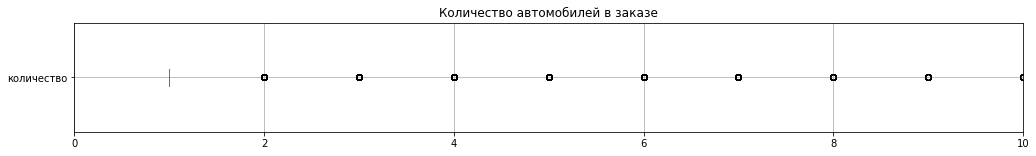

In [61]:
# оценим относятся ли заказы с большим количеством автомобилей к выбросам
fig, ax = plt.subplots(figsize = (17,2))
ax = df[['количество']].boxplot(vert = False, ax =ax)
plt.xlim([0, 10]) # ограничим ось Х, чтобы внимательно посмотреть на ящик с усами
ax.set_title('Количество автомобилей в заказе')

Получается, что основная масса заказов с 1 автомобилем, все остальное можно отнести к выбросам (скорее всего корпоративные продажи). Однако не будем удалять эти данные.

In [62]:
# Определим количество пропусков
df['количество'].isnull().sum()

4

In [63]:
# данные с пропусками
df = df.dropna(subset = 'количество')

In [64]:
# Так же заменим тип данных на целочисленные
df['количество'] = df['количество'].astype(int)

Text(0.5, 1.0, 'Цена автомобилей')

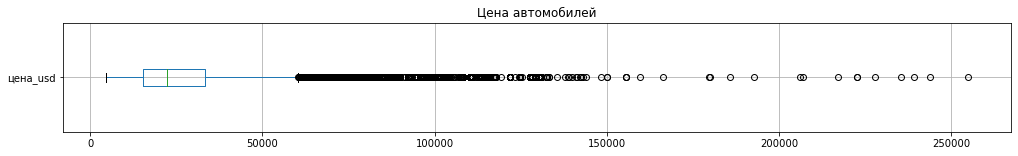

In [65]:
# оценим цену автомобилей
fig, ax = plt.subplots(figsize = (17,2))
ax = df[['цена_usd']].boxplot(vert = False, ax =ax)
ax.set_title('Цена автомобилей')

Основная масса авто стоит до 70 000 USD

Text(0.5, 1.0, 'Цена продажи автомобилей')

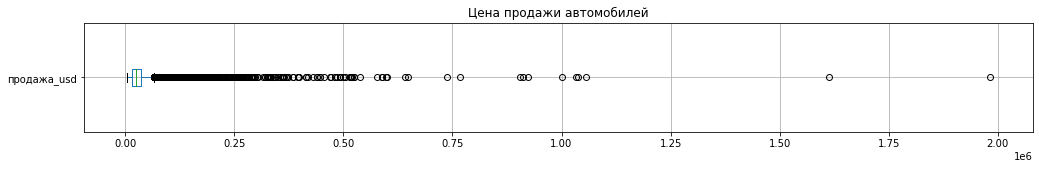

In [66]:
# оценим цену продажи автомобилей
fig, ax = plt.subplots(figsize = (17,2))
ax = df[['продажа_usd']].boxplot(vert = False, ax =ax)
ax.set_title('Цена продажи автомобилей')

In [67]:
# Посмотрим крупные заказы с общей стоимостью более 1 млн USD
df.query('продажа_usd > 1000000')

,месяц,компания,бренд,модель,год_выпуска,страна_производитель,вид_топлива,объём_двиг_л,коробка_передач,тип_привода,регион,количество,цена_usd,продажа_usd,сегментация_2013,класс_2013
960,4,Daewoo Bus Kazakhstan,Daewoo,BS 106 A,2018,Республика Казахстан,дизель,2.5,механика,2WD,Атырау,10,100083.762410,1.000838e+06,Коммерческие автомобили,Большие автобусы
962,5,Daewoo Bus Kazakhstan,Daewoo,BS 106 A,2018,Республика Казахстан,дизель,2.5,механика,2WD,Атырау,20,99046.109774,1.980922e+06,Коммерческие автомобили,Большие автобусы
13420,6,БИПЭК АВТО,Lada,Vesta,2018,Республика Казахстан,бензин,1.6,механика,FWD,Караганда,91,11600.000000,1.055600e+06,Легковые автомобили,B класс
20465,7,БИПЭК АВТО,Skoda,Superb B6,2018,Республика Казахстан,бензин,2.0,автомат,FWD,Астана,29,35588.250000,1.032059e+06,Легковые автомобили,E класс
32214,3,Daewoo Bus Kazakhstan,Daewoo,ВС 211 МА,2018,Республика Казахстан,дизель,2.5,механика,2WD,Семей,9,115373.550790,1.038362e+06,Коммерческие автомобили,Большие автобусы
32215,9,Daewoo Bus Kazakhstan,Daewoo,ВС 211 МА,2018,Республика Казахстан,дизель,2.5,механика,2WD,Атырау,16,100879.560710,1.614073e+06,Коммерческие автомобили,Большие автобусы


В целом данные не выывают подозрений, т.к. в заказы с высокой стоимостью попали оптовые закупки большего количества легковушек (судя по комплектации - вероятно для такси), а так же продажа нескольких единиц коммерческого транспорта с высокой стоимостью единицы.

In [68]:
# Посмотрим на значения в сегментации авто
df['сегментация_2013'].unique()

array(['Легковые автомобили ', 'Внедорожники ',
       'Коммерческие автомобили ', 'Минивэны', 'Пикапы '], dtype=object)

In [69]:
# Посмотрим на значения в классах авто
df['класс_2013'].unique()

array(['C класс ', 'D класс ', 'Спортивные автомобили ', 'E класс ',
       'F класс ', 'Среднеразмерные SUV ', 'Стандартные SUV ',
       'Компактные SUV ', 'B класс ', 'Субкомпактные SUV ',
       'Большие автобусы ', 'Микроавтобусы ', 'Малотоннажные грузовики ',
       'Развозные автомобили ', 'Среднетоннажные грузовики ',
       'Полноразмерный Минивэн ', 'Средние автобусы ',
       'Крупнотоннажные грузовики ', 'Полноразмерные SUV ', 'Pick-ups',
       'A класс ', 'Компактвэн'], dtype=object)

В целом в сегментации и классах авто все в порядке, оставляем так как есть.

**Посмотрим на данные после предобработки**

In [70]:
# Проверим какую долю данных мы удалили в результате обработки
1 - len(df)/len(df_control)

0.08872587812747301

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29939 entries, 1 to 32767
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   месяц                 29939 non-null  int64  
 1   компания              29939 non-null  object 
 2   бренд                 29939 non-null  object 
 3   модель                29939 non-null  object 
 4   год_выпуска           29939 non-null  int32  
 5   страна_производитель  29939 non-null  object 
 6   вид_топлива           29939 non-null  object 
 7   объём_двиг_л          29939 non-null  float64
 8   коробка_передач       29939 non-null  object 
 9   тип_привода           29939 non-null  object 
 10  регион                29939 non-null  object 
 11  количество            29939 non-null  int32  
 12  цена_usd              29939 non-null  float64
 13  продажа_usd           29939 non-null  float64
 14  сегментация_2013      29939 non-null  object 
 15  класс_2013         

**Выводы по предобработке данных**

Были загружены и предобработаны данные: удалены не нужны для анализа столбцы, удалены данные с пропусками (всего около 9% от исходного). Была произведена унификация некоторых характеристик, например, по типу коробки передач и приводу, в результате чего ряд типов были объединены. Кроме того, были обработаны варианты различного занесения данных (написание на русском и английском, учет объема в литрам и сантиметрах и т.п.) в результате чего данные стали более корректными и единообразными.

При анализе было установлено, что подавляющее количество продаж – это продажи по 1 автомобилю, однако имеют место быть и крупные единовременные продажи нескольких десятков машин.
Основная масса автомобилей имеет стоимость до 70 000 USD. При этом есть продажи премиальных и коммерческих автомобилей с высокой стоимостью до 250 000 USD за единицу.


## 2. Анализ рынка

Определим топовые бренды автомобилей на рынке Казахстана: в денежном и натуральном выражении (10 марок)

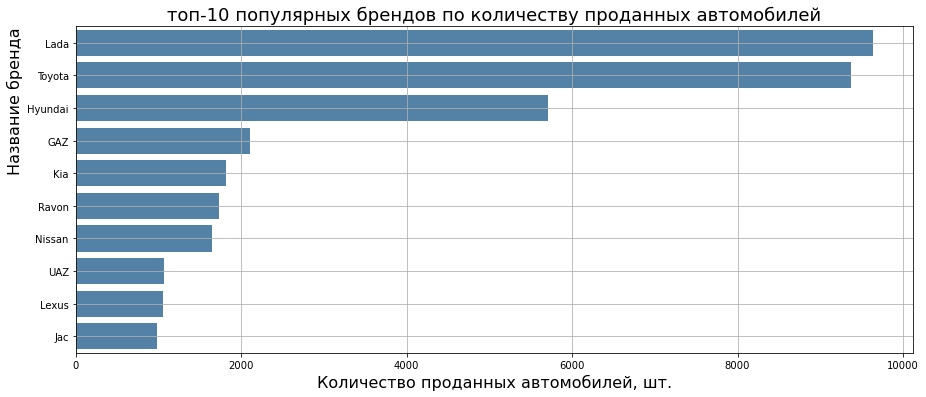

In [72]:
# по количеству проданных автомобилей
# Сделаем группировку названий по маркам автомобилей
df_marks = df.groupby('бренд', as_index = False)[['количество']]\
                 .sum()\
                 .sort_values(by = ['количество'], ascending = False)
plt.figure(figsize=(15, 6))
sns.barplot(x='количество', y='бренд', data=df_marks.head(10), color= 'steelblue')
plt.title('топ-10 популярных брендов по количеству проданных автомобилей', size = 18)
plt.xlabel('Количество проданных автомобилей, шт.', size = 16)
plt.ylabel('Название бренда', size = 16, loc='top')
plt.grid()
plt.show()

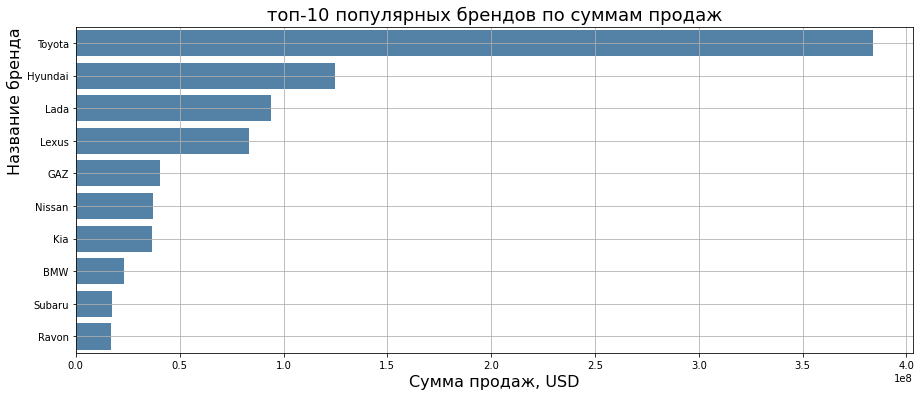

In [73]:
# по сумме продаж
# Сделаем группировку названий по маркам автомобилей
df_marks = df.groupby('бренд', as_index = False)[['продажа_usd']]\
                 .sum()\
                 .sort_values(by = ['продажа_usd'], ascending = False)
plt.figure(figsize=(15, 6))
sns.barplot(x='продажа_usd', y='бренд', data=df_marks.head(10), color= 'steelblue')
plt.title('топ-10 популярных брендов по суммам продаж', size = 18)
plt.xlabel('Сумма продаж, USD', size = 16)
plt.ylabel('Название бренда', size = 16, loc='top')
plt.grid()
plt.show()

По количеству продаж с большим отрывом от других брендов лидируют Lada, Toyota и Hundai. Однако по суммам продаж с большим отрывом идет Toyota за счет более высокой стоимости одного автомобиля.

In [74]:
# Определим общий объем продаж в казахстане по числу автомобилей и сумме
print(f'Общее количество проданных автомобилей за январь-сентябрь 2019: {df["количество"].sum():,.0f} шт.')
print(f'Общая сумма продаж автомобилей за январь-сентябрь 2019: {df["продажа_usd"].sum():,.0f}')

Общее количество проданных автомобилей за январь-сентябрь 2019: 40,429 шт.
Общая сумма продаж автомобилей за январь-сентябрь 2019: 1,016,697,791


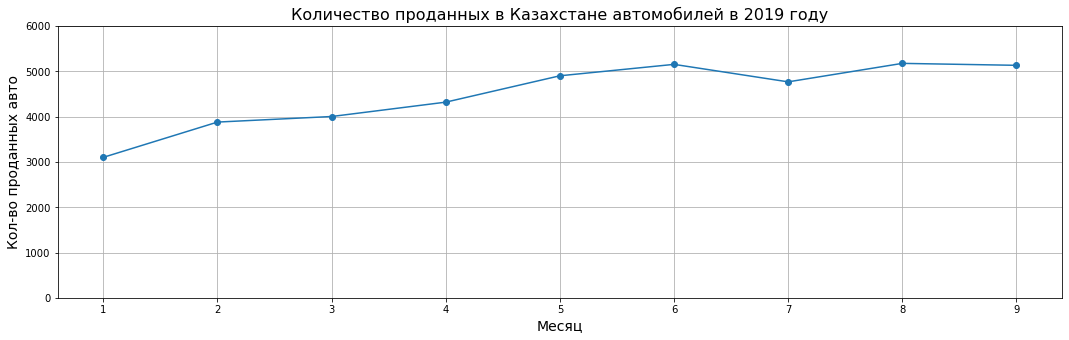

In [75]:
# Динамика продаж в целом по рынку: в денежном и натуральном выражении (помесячно)

# Построим график количества проданных в Казахстане автомобилей в 2019 году помесячно
df.pivot_table(index = 'месяц', values = 'количество', aggfunc = 'sum')\
    .plot(grid = True, figsize =(18,5), legend = False, style = 'o-')
plt.title('Количество проданных в Казахстане автомобилей в 2019 году', size = 16)
plt.ylabel('Кол-во проданных авто', size = 14)
plt.xlabel('Месяц', size = 14)
plt.ylim([0, 6000])
plt.show()

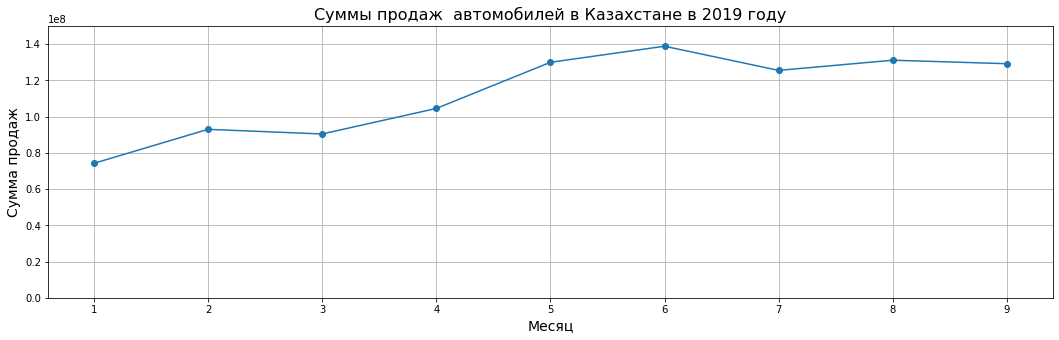

In [76]:
# Построим график общих сумм продаж в Казахстане автомобилей в 2019 году помесячно
df.pivot_table(index = 'месяц', values = 'продажа_usd', aggfunc = 'sum')\
    .plot(grid = True, figsize =(18,5), legend = False, style = 'o-')
plt.title('Суммы продаж  автомобилей в Казахстане в 2019 году', size = 16)
plt.ylabel('Сумма продаж', size = 14)
plt.xlabel('Месяц', size = 14)
plt.ylim([0, 150000000])
plt.show()

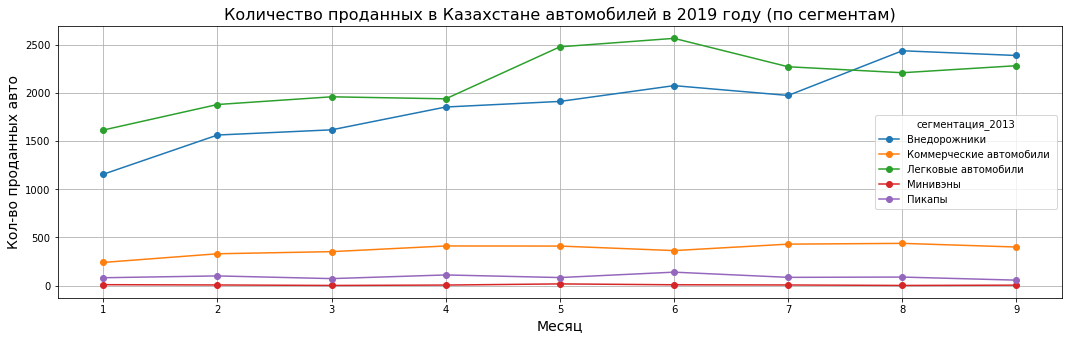

In [77]:
# Динамика продаж по категориям (помесячно): тип топлива, класс, сегмент
# Посмотрим количества проданных автомобилей помесячно (в разрезе сегмента автомобилей)
df.pivot_table(index = 'месяц', columns='сегментация_2013', values = 'количество', aggfunc = 'sum')\
    .plot(grid = True, figsize =(18,5), legend = True, style = 'o-')
plt.title('Количество проданных в Казахстане автомобилей в 2019 году (по сегментам)', size = 16)
plt.ylabel('Кол-во проданных авто', size = 14)
plt.xlabel('Месяц', size = 14)
plt.show()

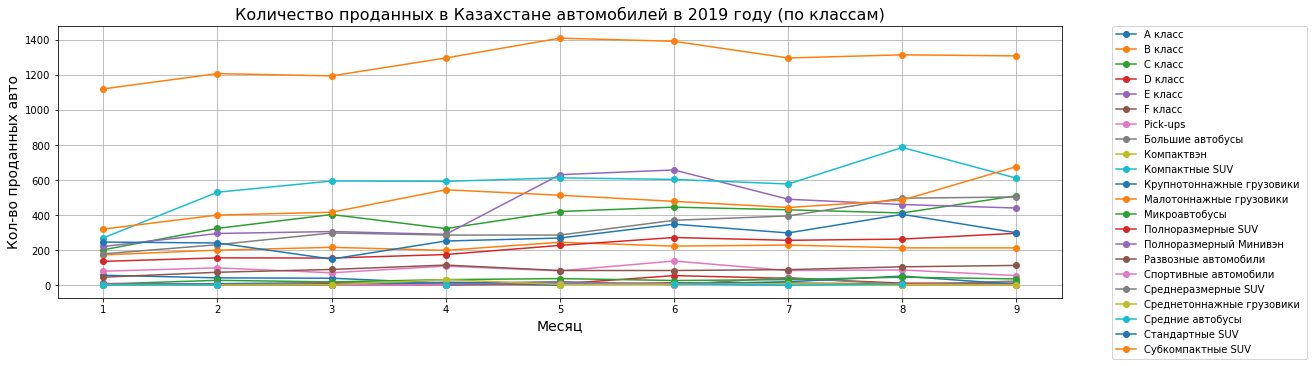

In [78]:
# Посмотрим количества проданных автомобилей помесячно (в разрезе класса автомобилей)
df.pivot_table(index = 'месяц', columns='класс_2013', values = 'количество', aggfunc = 'sum')\
    .plot(grid = True, figsize =(18,5), legend = True, style = 'o-')
plt.title('Количество проданных в Казахстане автомобилей в 2019 году (по классам)', size = 16)
plt.ylabel('Кол-во проданных авто', size = 14)
plt.xlabel('Месяц', size = 14)
plt.legend(bbox_to_anchor=( 1.05, 1 ), loc='upper left', borderaxespad= 0 )
plt.show()

In [79]:
# Посмотрим продажи автомобилей по типам топлива
df.pivot_table(index ='вид_топлива',  values ='количество', aggfunc = 'sum')

,количество
вид_топлива,
бензин,39553
газ,38
гибрид,24
дизель,814


In [80]:
# Посмотрим продажи автомобилей по компаниям (ТОП10)
pd.set_option('display.float_format', '{:,.0f}'.format)
df.pivot_table(index ='компания',  values =['количество','продажа_usd'], aggfunc = 'sum')\
  .sort_values('продажа_usd', ascending = False)\
  .head(10)


,количество,продажа_usd
компания,,
Toyota Motor Kazakhstan,10425,"467,160,158"
БИПЭК АВТО,12510,"151,241,688"
Astana Motors,5779,"128,815,365"
Вираж,3358,"58,116,989"
Nissan Manufacturing RUS,1739,"43,263,539"
Allur Auto,1266,"25,529,354"
Mercur Auto,723,"24,323,357"
Автоцентр-Бавария,386,"23,689,382"
Subaru Kazakhstan,520,"17,311,553"


Mercur Auto, по заданию которого провдодится исследоваение занимает 7 место по объемам продаж в стоймостном выражении

In [81]:
# Посмотрим продажи автомобилей по регионам ТОП 10
df.pivot_table(index =['регион'],  values =['количество','продажа_usd'], aggfunc = 'sum')\
  .sort_values('продажа_usd', ascending = False).head(10)

,количество,продажа_usd
регион,,
Алматы,10457,"323,527,585"
Астана,7572,"224,027,870"
Атырау,3087,"67,277,699"
Шымкент,2682,"55,724,132"
Костанай,2543,"54,125,371"
Караганда,2348,"48,593,414"
Усть-Каменогорск,1764,"35,673,834"
Актау,1712,"35,362,494"
Уральск,1619,"35,006,804"


In [82]:
# Посмотрим продажи автомобилей по сегментам
df.pivot_table(index =['сегментация_2013'],  values =['количество','продажа_usd'], aggfunc = 'sum')\
  .sort_values('продажа_usd', ascending = False)

,количество,продажа_usd
сегментация_2013,,
Внедорожники,16979,"562,575,845"
Легковые автомобили,19205,"339,623,544"
Коммерческие автомобили,3374,"85,047,089"
Пикапы,814,"27,126,131"
Минивэны,57,"2,325,181"


In [83]:
# Посмотрим продажи автомобилей по классам
df.pivot_table(index =['класс_2013'],  values =['количество','продажа_usd'], aggfunc = 'sum')\
  .sort_values('продажа_usd', ascending = False)

,количество,продажа_usd
класс_2013,,
Полноразмерные SUV,1945,"140,843,260"
Компактные SUV,5182,"136,816,484"
E класс,3798,"130,998,918"
B класс,11535,"129,897,404"
Стандартные SUV,2515,"128,539,692"
Среднеразмерные SUV,3053,"101,021,842"
C класс,3478,"64,367,381"
Субкомпактные SUV,4284,"55,354,567"
Малотоннажные грузовики,1920,"38,978,572"


**Выводы:** На основании полученных данных можно выделить самый продаваемый автомобиль / бренд /
автоцентр / регион?

## 3. Расчет финансовых показателей

Рассчитаем параметры прибыли. По данным заказчика в среднем в стоимости автомобилей заложено 3% прибыли.

In [84]:
#  Добавим столбец для расчета прибыли
df['прибыль_usd']= df['продажа_usd']*0.03

In [85]:
print(f' Общая прибыль по всему рынку Казахстана за рассматриваемый период составила: {df["прибыль_usd"].sum():,.0f} usd')

 Общая прибыль по всему рынку Казахстана за рассматриваемый период составила: 30,500,934 usd


In [86]:
# Посмотрим по брендам (ТОП15)
df.pivot_table(index ='бренд',  values =['прибыль_usd'], aggfunc = 'sum')\
  .sort_values('прибыль_usd', ascending = False)\
  .head(15)

,прибыль_usd
бренд,
Toyota,"11,516,255"
Hyundai,"3,745,416"
Lada,"2,816,118"
Lexus,"2,498,550"
GAZ,"1,212,618"
Nissan,"1,109,645"
Kia,"1,102,527"
BMW,"697,979"
Subaru,"519,347"


In [87]:
# оценим среднюю стоимость продажи за период
print(f' Средняя стоимость продажи автомобиля в Казахстана за рассматриваемый\
         период составила: {df["продажа_usd"].mean():,.0f} usd')

 Средняя стоимость продажи автомобиля в Казахстана за рассматриваемый         период составила: 33,959 usd


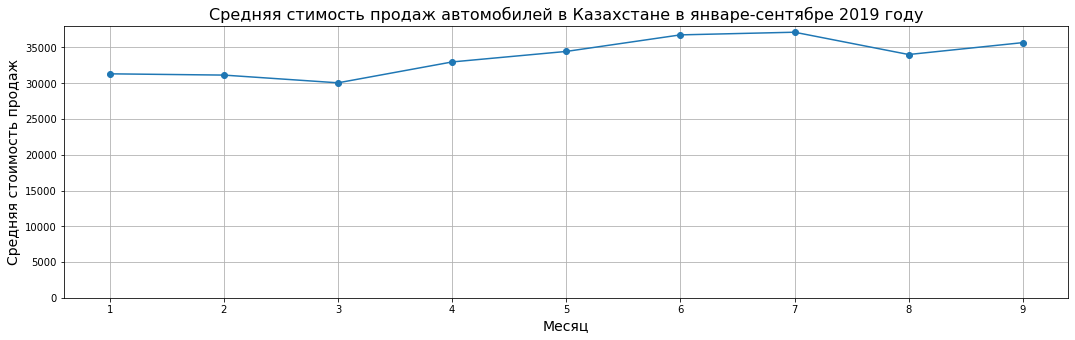

In [88]:
# Построим график срденей стоимости продаж в Казахстане автомобилей в 2019 году помесячно
df.pivot_table(index = 'месяц', values = 'продажа_usd', aggfunc = 'mean')\
    .plot(grid = True, figsize =(18,5), legend = False, style = 'o-')
plt.title('Средняя стимость продаж автомобилей в Казахстане в январе-сентябре 2019 году', size = 16)
plt.ylabel('Средняя стоимость продаж', size = 14)
plt.xlabel('Месяц', size = 14)
plt.ylim(0,38000)
plt.show()

In [89]:
# Посмотрим общую емкость рынка
# умножим имеющиеся данные на 1.33, т.к. у нас представлены данные за 9 месяцев, а не год в целом
print(f'Общая прогнозная годовая емкость рынка составляет {df["продажа_usd"].sum()*1.33:,.0f} USD')

Общая прогнозная годовая емкость рынка составляет 1,352,208,061 USD


In [90]:
# Проведем анализ позиции дилера-заказчика Mercur-auto

print(f'общая доля рынка дилера в количественном выражении \
        {df[df["компания"] == "Mercur Auto"]["количество"].sum()/df["количество"].sum():0.2%}')
print(f'общая доля рынка дилера в стоимостном выражении \
        {df[df["компания"] == "Mercur Auto"]["продажа_usd"].sum()/df["продажа_usd"].sum():0.2%}')

общая доля рынка дилера в количественном выражении         1.79%
общая доля рынка дилера в стоимостном выражении         2.39%


In [91]:
# посмотрим какие марки продает дилер
merkur_brand = df[df['компания'] == "Mercur Auto"].pivot_table(index ='бренд',  values =['количество', 'продажа_usd'], aggfunc = 'sum')\
  .sort_values('продажа_usd', ascending = False)
merkur_brand

,количество,продажа_usd
бренд,,
Volkswagen,558,"11,450,900"
Porsche,60,"6,547,384"
Audi,105,"6,325,073"


In [92]:
# присоединим таблицу с общими продажами по брендам, торгуемым дилером
all_brand2 = df.pivot_table(index ='бренд',  values =['количество', 'продажа_usd'], aggfunc = 'sum')
merkur_brand = merkur_brand.merge(all_brand2, on='бренд', how='left')
merkur_brand = merkur_brand.reset_index()
merkur_brand.columns = ['brand','merkur_count', 'merkur_sum', 'all_count', 'all_sum']
merkur_brand['count_%'] = merkur_brand['merkur_count']/merkur_brand['all_count']*100
merkur_brand['sum_%'] = merkur_brand['merkur_sum']/merkur_brand['all_sum']*100
merkur_brand

,brand,merkur_count,merkur_sum,all_count,all_sum,count_%,sum_%
0,Volkswagen,558,"11,450,900",558,"11,450,900",100,100
1,Porsche,60,"6,547,384",60,"6,547,384",100,100
2,Audi,105,"6,325,073",105,"6,325,073",100,100


Получается, что дилер является эrсклюзивным продавцом данных марок c долей в 100%

In [93]:
# посмотрим какие классы продает дилер
merkur_class = df[df['компания'] == "Mercur Auto"].pivot_table(index ='класс_2013',  values =['количество', 'продажа_usd'], aggfunc = 'sum')\
  .sort_values('продажа_usd', ascending = False)
merkur_class

,количество,продажа_usd
класс_2013,,
B класс,379,"5,780,447"
Стандартные SUV,49,"4,499,718"
Компактные SUV,89,"3,596,455"
F класс,22,"3,245,792"
E класс,51,"2,472,570"
C класс,81,"1,717,912"
Среднеразмерные SUV,30,"1,558,835"
Спортивные автомобили,4,"535,280"
Полноразмерный Минивэн,4,"305,646"


In [94]:
# присоединим таблицу с общими продажами по брендам, торгуемым дилером
all_class = df.pivot_table(index ='класс_2013',  values =['количество', 'продажа_usd'], aggfunc = 'sum')
merkur_class = merkur_class.merge(all_class, on='класс_2013', how='left')
merkur_class = merkur_class.reset_index()
merkur_class.columns = ['brand','merkur_count', 'merkur_sum', 'all_count', 'all_sum']
merkur_class['count_%'] = merkur_class['merkur_count']/merkur_class['all_count']*100
merkur_class['sum_%'] = merkur_class['merkur_sum']/merkur_class['all_sum']*100
merkur_class

,brand,merkur_count,merkur_sum,all_count,all_sum,count_%,sum_%
0,B класс,379,"5,780,447",11535,"129,897,404",3,4
1,Стандартные SUV,49,"4,499,718",2515,"128,539,692",2,4
2,Компактные SUV,89,"3,596,455",5182,"136,816,484",2,3
3,F класс,22,"3,245,792",63,"7,705,904",35,42
4,E класс,51,"2,472,570",3798,"130,998,918",1,2
5,C класс,81,"1,717,912",3478,"64,367,381",2,3
6,Среднеразмерные SUV,30,"1,558,835",3053,"101,021,842",1,2
7,Спортивные автомобили,4,"535,280",5,"636,946",80,84
8,Полноразмерный Минивэн,4,"305,646",49,"2,196,781",8,14
9,D класс,8,"293,041",168,"4,562,359",5,6


У Mercur Auto наблюдается различная доля продаж, например дилер занимает 84 % рынка спортивных автомобилей, однако учитывая,что было продано всего 5 автомобилей такого класса, то это нельзя считать показателем. В самом большом по объемам B классе доля компании составляет порядка 4%.

Проанализируем возможных конкурентов по региону и классу машин. Конкуренция по марке отсутсвует, т.к. дилер является эксклюзивным рпедставителем


Ближайшие конкуренты дилера (тот же регион, та же марка, тот же класс машин

In [95]:
merkur_region = df[df['компания'] == "Mercur Auto"]['регион'].unique()
merkur_region

array(['Алматы', 'Костанай', 'Атырау', 'Астана', 'Караганда', 'Уральск'],
      dtype=object)

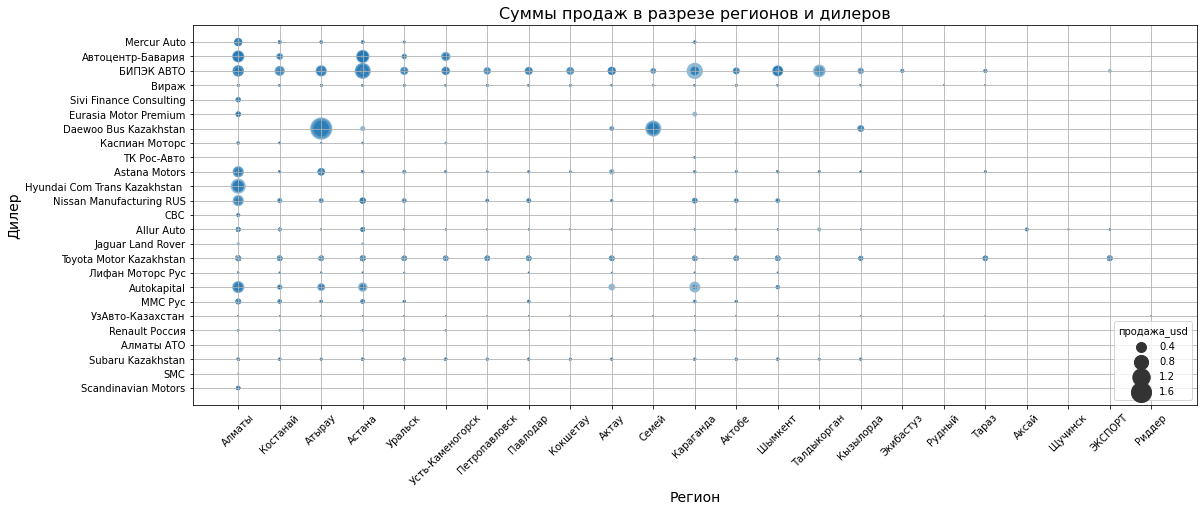

In [96]:
plt.figure(figsize=(18, 7))
sns.scatterplot(data=df,  x='регион', y='компания',  size='продажа_usd',\
                sizes=(0, 500), alpha=.5)
plt.title('Суммы продаж в разрезе регионов и дилеров', size = 16)
plt.ylabel('Дилер', size = 14)
plt.xlabel('Регион', size = 14)
plt.xticks(rotation = 45)
plt.grid()
plt.show()

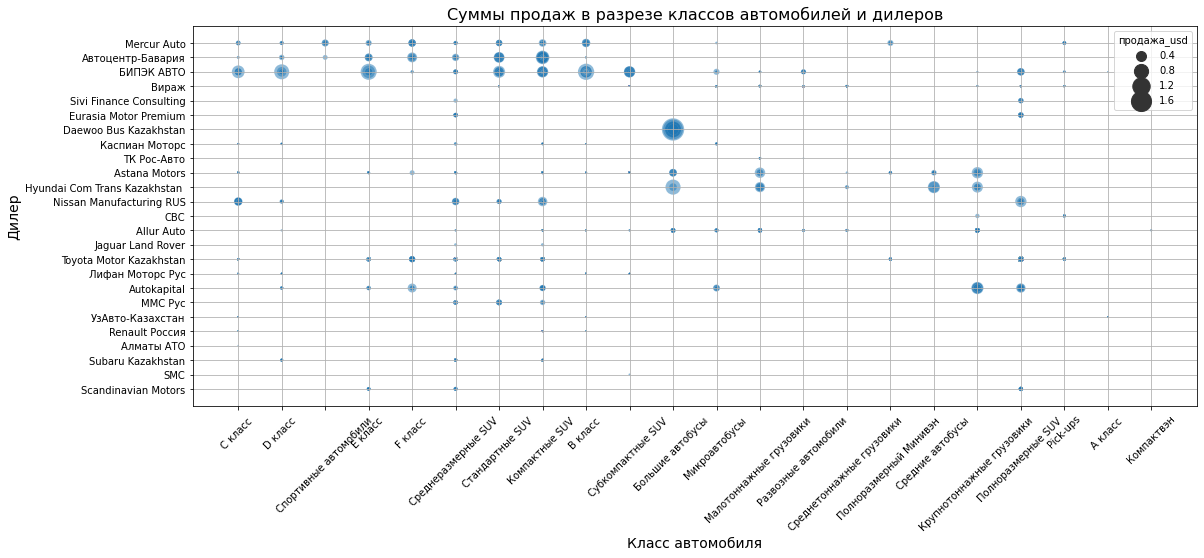

In [97]:
plt.figure(figsize=(18, 7))
sns.scatterplot(data=df,  x='класс_2013', y='компания',  size='продажа_usd',\
                sizes=(0, 500), alpha=.5)
plt.title('Суммы продаж в разрезе классов автомобилей и дилеров', size = 16)
plt.ylabel('Дилер', size = 14)
plt.xlabel('Класс автомобиля', size = 14)
plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [98]:
model = df.pivot_table(index =['бренд','компания'],  values =['количество', 'продажа_usd'], aggfunc = 'sum').reset_index()
model.head()

,бренд,компания,количество,продажа_usd
0,ANKAI,Allur Auto,38,"2,938,753"
1,Audi,Mercur Auto,105,"6,325,073"
2,BMW,Автоцентр-Бавария,372,"23,265,963"
3,Cadillac,Eurasia Motor Premium,16,"1,584,965"
4,Cadillac,Sivi Finance Consulting,3,"339,062"


## 4. Выводы и рекомендации

Общая емкость рынка автомобилей Казахстана составляет порядка 1,3-1,5 млрд долларов (с учетом исключенных при чистке данных) в года.
В продажах автомобилей в Казахстане наблюдается определенная сезонность – продажи растут в летний период. 
Основные категории автомобилей, которые продаются это легковые автомобили и внедорожники.  Причем если легковые автомобили лидируют по количеству продаж, то внедорожники занимают первое место по суммарной стоимости продаж. Абсолютным лидером по продажам является B класс автомобилей.
Дилер – заказчик занимается реализацией Volkswagen (в том числе и грузовых автомобилей), Audi и Porche. Данные марки не входят в ТОП-10 продаж, как в количественном выражении, так и по общим суммам продаж за январь-сентябрь 2019 года. Volkswagen занимает всего 15 место по объему выручки. В целом Mercur-auto занимает порядка 2% рынка.
По количеству продаж с лидируют Lada, Toyota и Hundai. Однако по суммам продаж с большим отрывом идет Toyota за счет более высокой стоимости одного автомобиля.

В качестве рекомендаций заказчику возможно предложить:
 - расширить географию уделить внимание населенным пунктам, Входящим в ТОП-10 по продажам,  где компания не представлена (Например Шымкент, Усть-Каменогорск и др).
 
- учитывая, что дилер является эксклюзивным продавцом данных марок на рынке Казахстана – провести рекламную компанию (возможно с участием автопроизводителей) по популяризации продаваемых марок авто.


- если есть возможность расширить модельный ряд – за счет продажи Марок из ТОП-3: Toyota, Hundai и Lada.
